# 다항회귀

## 다항식 특성으로 변환

In [1]:
# sample [[0,1][2, 3]] 변환 연습

import numpy as np

X = np.arange(4).reshape(2,2)
print(X)

[[0 1]
 [2 3]]


In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2) #2차 다항식

In [3]:
poly.fit(X)
X_poly = poly.transform(X) 
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [4]:
#위에 두 줄 한 번에
X_poly = poly.fit_transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) #3차 다항식
X_poly = poly.fit_transform(X)
print(X_poly)
poly.get_feature_names()

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

## 사이킷런으로 다항 회귀 분석

In [7]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

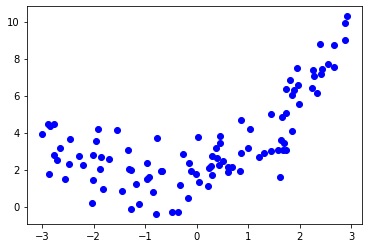

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

plt.scatter(X, y, color='blue')
plt.show()

In [9]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

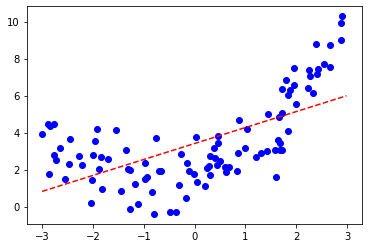

In [10]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm

X_test = np.arange(-3, 3, 0.01)[:, np.newaxis]

X1_train = X
y_train = y

reg1 = lm.LinearRegression().fit(X1_train, y_train)

X1_test = X_test
y1_pred = reg1.predict(X1_test)

plt.plot(X_test, y1_pred, color='r', linestyle='--')
plt.scatter(X1_train, y, color='b')

In [11]:
# 3) 2차항 형태로 다항 회귀 수행

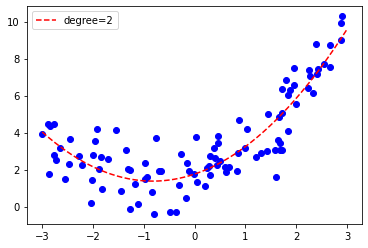

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X2_train = poly.fit_transform(X)
y_train = y

reg2 = LinearRegression().fit(X2_train, y_train)

xx = np.arange(-3, 3, 0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis]))

plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

In [15]:
# 구해진 2차식의 계수 확인

In [16]:
reg2.intercept_, reg2.coef_

(array([1.75881156]), array([[0.        , 0.92485839, 0.5611565 ]]))

In [18]:
X2_train.shape

(100, 3)

In [19]:
# 4) 7차항 형태로 다항회귀 수행

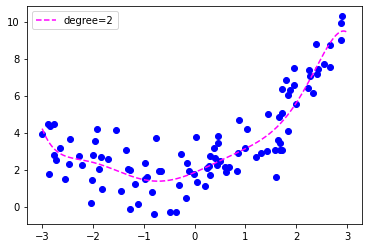

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)

X7_train = poly.fit_transform(X)
y_train = y

reg2 = LinearRegression().fit(X7_train, y_train)

xx = np.arange(-3, 3, 0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis]))

plt.plot(xx, yy, color='magenta', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b')
plt.legend()
plt.show()

In [22]:
X7_train.shape

(100, 8)

In [ ]:
# 5. 여러 형태의 시각화 그래프 비교

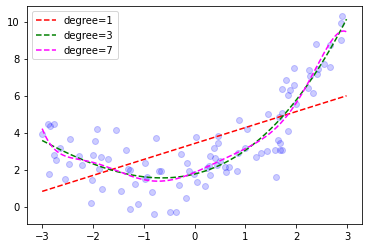

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['red', 'green', 'magenta']

plt. scatter(X, y, color='b', alpha=0.2)
for i,d in enumerate(degree):
    poly = PolynomialFeatures(degree=d)
    X_train = poly.fit_transform(X)
    y_train = y
    
    reg = LinearRegression().fit(X_train, y_train)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(poly.transform(xx[:, np.newaxis]))
    
    plt.plot(xx, yy, color=colors[i], linestyle='--',
            label = 'degree={}'.format(d))
    plt.legend()
plt.show()

In [ ]:
# pipeline을 활용한 다항회귀

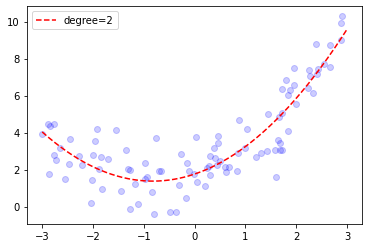

In [25]:
# 1) degree=2인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2),
                   LinearRegression()).fit(X, y)
xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
yy = reg.predict(xx)

plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b', alpha=0.2)
plt.legend()
plt.show()

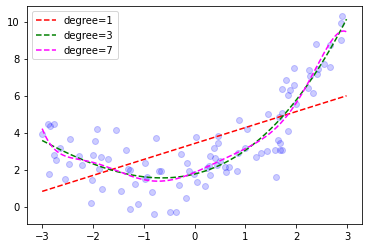

In [28]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환-추정 통합

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['red', 'green', 'magenta']

plt. scatter(X, y, color='b', alpha=0.2)
for i,d in enumerate(degree):
    reg = make_pipeline(PolynomialFeatures(degree=d),
                       LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)[:, np.newaxis]
    yy = reg.predict(xx)
    
    plt.plot(xx, yy, color=colors[i], linestyle='--',
            label = 'degree={}'.format(d))
    plt.legend()
plt.show()

In [29]:
np.arange(-3, 3, 1)

array([-3, -2, -1,  0,  1,  2])

In [31]:
np.arange(-3, 3, 1).reshape(-1, 1) #reshape(행, 열)
                                   #-1이면 상관없이 맞춰주라는 의미

array([[-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2]])

In [30]:
np.arange(-3, 3, 1)[:, np.newaxis]

array([[-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2]])

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

# [실습 ]: 당뇨병 진행도 VS bmi

### 필요한 모듈 import

#### 데이터 수집

In [ ]:
boston = load_boston()

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
# 데이터프레임 확인


In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값

In [ ]:
#원본 데이터 단순 회귀


In [ ]:
# 아래 셀에 있는 '???'를 지우고 본인이 작성한 코드를 입력하면 됩니다. 

In [ ]:
# 2차식의 다항회귀
X2_train = ???
X2_test = ???

reg2 = ???
y_pred2 = ???

print(reg2.coef_, reg2.intercept_)

xx2 = ???
yy2 = ???

In [ ]:
# 3차식의 다항회귀
X3_train = ???
X3_test = ???

reg3 = ???
y_pred3 = ???

print(reg3.coef_, reg3.intercept_)

xx3 = ???
yy3 = ???


####  다항 회귀 시각화

#### 모델 성능 평가

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
print(pd.Series(data))
